<a href="https://colab.research.google.com/github/phas-ml/phas-ml.github.io/blob/master/notebooks/2020_10_05_basic_nn_tutorial_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports
import numpy as np
import matplotlib.pyplot as plt

import torch

plt.style.use('seaborn-notebook')

# Introduction to Neural Networks for Classification


This post covers some of the basic concepts that are necessary to understand neural networks and implement them for basic supervised classification and regression task. It's copied largely word for word from this post I wrote for our last tutorial on the same topic: https://mj-will.github.io/intro2ml/topics/t0_classification_regression.html


## What is a neural network?

A neural network is a function that learns a mapping from an input $x$ and produces an output $y$:

$$y = f_{\text{NN}}(x)$$

The core building block that allows a neural network to learn are **neurons**, they have parameters that can be updated which allowing for them to learn a mapping. For a input vector $\mathbf{x}$ a neuron is defined as:

$$y = \sigma (\mathbf{w} \cdot \mathbf{x} + b)$$

where $\mathbf{w}$ is a vector of trainable parameters known as the **weights**, $b$ a scalar value that is also trainable and known as the **bias** and $\sigma$ a chosen function, known as an **activation function**, that is normally non-linear and should be differentiable. Neurons are often depicted as nodes with inputs and outputs:

The non-linearity of activation functions is what allows an neural network to learn complex non-linear mappings. There are numerous different functions that are used but perhaps the most common is the rectified linear unit or ReLU for short. It is defined as:

$$\sigma(x)= \begin{cases} x \quad & \text{if} \ x > 0 \\ 0 & \text{elsewhere} \end{cases}$$


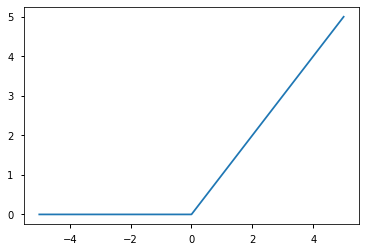

In [2]:
#@title Relu
def ReLU(x):
    return x.clamp(min=0)
x = torch.linspace(-5, 5, 1000)
y = ReLU(x)
plt.plot(x,y )
plt.show()



Other common activations functions include TanH, Exponential Linear Unit (ELU) and Leaky ReLU. See [here](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) for more information.



### From a single neuron to a network

A single neural network contains multiple neurons and they are arranged in layers.


Each layer is a vector function (it returns a vector) that has a weights matrix $\mathbf{W}_{\text{l}}$ and bias vector $\mathbf{b}_{\text{l}}$:

$$\mathbf{f}_{\text{l}}(\mathbf{x}) = \mathbf{\sigma}_{\text{l}} (\mathbf{W}_{\text{l}} \cdot \mathbf{x} + \mathbf{b}_{\text{l}})$$

A neural network therefore behaves like a set of nested functions, for three layers this would be:

$$y = f_{\text{NN}} (\mathbf{x}) = \mathbf{f}_{3}(\mathbf{f}_{2}(\mathbf{f}_{1}(\mathbf{x}))$$


The form of the final layer depends on the task at hand and we will focus on this later on. Now that we have an rough description of a neural network we have to understand how a neural network is trained, that is, how does it learn?




## How does a neural network learn?  

The answer boils down to a **loss function**, **backpropogation** and **gradient descent**, so what are they?

### Loss function

In order for a neural network, or indeed almost any machine learning algorithm, to learn it needs a function to describe it's current performance. This function is known as a **loss function** or cost function and, in the case of a supervised task, it describes the difference between the networks output and the ground truth. An example of a loss function is the **mean squared error** (MSE) which, for a vector of predicted values $\mathbf{\hat{y}}$ and a vector of true values $\mathbf{y}$ both of length $N$ is defined as:

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}$$

Such as function can then be used to update the trainable parameters of the network with an algorithm such as backpropogation.

### Backpropogration and gradient descent

**Backpropogation** is an algorithm that calculates the gradient of the loss function with respect to the neural network's weights. It uses the chain rule and proceeds backwards through the network from the output through all of the layers. The gradients can the be used to change the parameters and try to minimise (or maximise) the loss function. 

This minimisation is then acheived using a **gradient descent algorithm**, such as stochastic graident descent, that explores the parameter space described by the networks weights. This is done in steps where the some data $\mathbf{x}$ is propogated through the network in a **forward pass** and the output $\mathbf{y}$, with the change in the loss function, used to update the weights.

For a more indepth explanation see [here](https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html).

Up until this point most of statements about neural networks have been problem agnostic but now we will focus on the specifics of two common types of problems: classification and regression.



## Differences between classification and regression

The main difference between classification and regression problems is what the network is trying to predict. 

In **classification** the goal is to correctly identify the **class** an input corresponds to, this could be distinguishing between images of cats and dogs or between types of signals. The output is normally a predicted class or a "probability" for each of the possible classes (the sum of which is one).

For **regression** the goal is to predict a value (or values) given an input, for example predicting housing prices or the frequency of signal. In this case the output is continuous over some range (or potentially unbounded) and the network must output a number (or vector of numbers).

So the core difference is the output and this is reflected in the activation function used in the last layer of the network. If the output is different then the same applied the function that quantifies the "quality" of the networks output, the loss function. 

### Classification

#### The sigmoid function and binary cross-entropy

This is limited to binary classification and outputs a number in the range $[0, 1]$ that can be considered a probability:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$



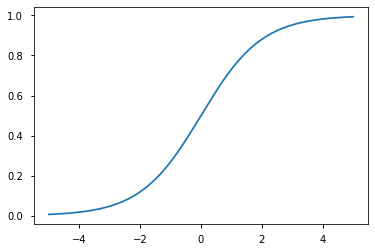

In [3]:
#@title Sigmoid
def sigmoid(x):
    return torch.div(1,  1 + torch.exp(-x))

x = torch.linspace(-5, 5, 1000)
y = sigmoid(x)
plt.plot(x,y )
plt.show()



The loss function for this case is **binary cross-entropy** (log-loss) which for $N$ samples is defined as:

$$\text{BCE} = - \sum_{i=1}^{N} y_{i} \log_{e}\left(\hat{y}_{i}\right) + (1 - y_{i}) \log_{e}\left(1 - \hat{y}_{i}\right)$$

where $\hat{y}_{i}$ is the probability for a particular sample $i$ and the $y_{i}$ the true value for the same sample.

#### The softmax function and cross-entropy

This is the generlised version of the sigmoid for n-class problems. The outputs are again defined on $[0,1]$ and importantly their sum is equal to 1. It is defined as:

$$\sigma(\mathbf{x})_{i} = \frac{e^{x_{i}}}{\sum_{j=1}^{C} e^{x_{j}}} \ \text{for} \ i=1, ..., C \ \text{and} \ \mathbf{x} \in \mathbb{R}^{C}$$

where $C$ is the number of classes. The loss function is the generalised version of binary cross-entropy, cross-entropy:

$$\text{CE} = - \sum_{i=1}^{N} \sum_{j=i}^{C} y_{ij} \log_{e}(\hat{y}_{ij}) $$

### Regression

#### The indentity

In regression problems the output of the neural network generally needs to be continous and unbounded so the activation function is simply the identity:

$$\sigma(x) = x $$



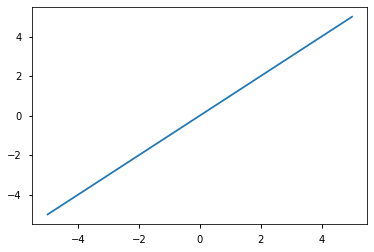

In [4]:
#@title Linear
def linear(x):
    return x
x = torch.linspace(-5, 5, 100)
y = linear(x)
plt.plot(x, y)
plt.show()

There is no one single loss function to use for regression task but the following are some of the most commonly used.

#### Mean squared error

Probably the go-to loss function for regression but is sensitive to outliers and will be heavily affected by single vey bad predictions.

$$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}$$

#### Mean absolute error

Very similar to MSE but not as sensitive to outliers.

$$\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_{i} - \hat{y}_{i}| $$

#### Mean squared logarithmic error

The mean squared logarithmic error is well suited to problems where the values a large and you are more concerned with relative errors.

$$\text{MSLE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left[\log_{e}(y_{i}+1) - \log_{e}(\hat{y}_{i}+1)\right]^{2}}$$

#### Other loss functions

The are numerous other loss functions that can be used in regression such as: root mean squared error, mean squared percentage error, R-squared... Each is best suited to particular use cases but those mentioned before will work in most situations. For more complete list see [here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html).

# On to a worked example

The following example contains the skeleton what you need to train a neural network. Most of the cells will need you to complete missing variables and define some functions.

There are also some additional *futher exercises* which are not necessary but are a good way of becoming more familiar with `torch`.

I suggest going through the main sections first and then coming back to the further exercises if you're interested. I have tried to provided a description of what you need to do in each cell but I'm expecting you to have to check the `torch` documentation for lists of functions and modules There's a lot of functionality in `torch`, so the documentation can seem a bit daunting, for the majority of this example you shouldn't need to stray to far from the `nn` module: https://pytorch.org/docs/stable/nn.html

## Structure

This example has three main sections:

* Dataset
* Model
* Training

## Dataset - Fashion MNIST

Most of us are familiar with MNIST, the dataset of handwritten digits  that is often used as a simple benchmark for machine learning. It's not hard to get close to 100% accuracy. Since the datasets machine learning is being applied to are getting more complicated there has been a movement towards more complex datasets for benchmarking.

Fashion MNIST is one such dataset, it contains **ten classes** like the original MNIST:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

The images are same size as the original MNIST (**28 x 28**) and have values between **0 and 255**. So it serves as a drop in replacement for the original MNIST.

We're now going to load the data and have a look at one of the images. This part is setup and you don't need to tweak anything, since loading the data can be very specific to your particular dataset.

FashionMNIST is include in torch's vision library `torchvision`, so we can download and load it from there. This will give us a `Dataset` object which generally make data loading easy. The can also include any pre-processing that
you might need to apply to your data.

In [5]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms


#### Tranforms

As metioned before, each pixel can take a value between 0 and 255. It's generally recommended to normalise or rescale your data if possible since this usually helps training. In this case we'll rescale to [0, 1] and include this in the set of pre-processing operations that are performed when loading the data.

We're also going to apply a transform to convert the data to a `Tensor`. These are very similar to `np.ndarray` but include extra bells and whistles for things like automatic differentiation and performing operations on GPUs. We don't need to worry to much about the details, but your data should always be converted to a `Tensor` before using it to train.


In [6]:
def scale(x):
    """Rescale data from [0, 255] to [0, 1]"""
    return x / 255

In [7]:
data_transforms = transforms.Compose([transforms.ToTensor(), scale])

PyTorch can load the dataset from an existing location or download it with `download=True`. If you were running things on a local machine you might want to have a directory with datasets in to avoid multiple copies.

#### Training and testing

FashionMNIST contains two sets of data, one for training (60K) and another smaller dataset for testing (10K). We can load them by setting the `train=True` or `train=False`.


In [8]:
# We give a location to download the data too, whether it's train or test and our list of data transforms.
train_dataset = FashionMNIST('./dataset/', train=True, download=True, transform=data_transforms)
test_dataset = FashionMNIST('./dataset/', train=False, download=False, transform=data_transforms)

We can now have a look at the one of the images. Notice we don't need to convert to a numpy array for plotting, this is all handled by PyTorch.

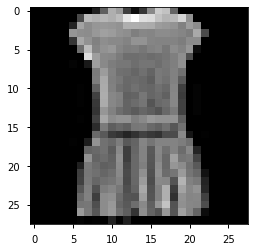

In [9]:
plt.imshow(train_dataset[3][0][0], cmap=plt.cm.gray)
plt.show()

### Dataloaders

We'll need to iterate through the data to train the neural network, whilst you could do this manually a `Dataloader` makes the whole process simpler and it call also do useful things like shuffle data and use mutiple workers to load data in parallel.

In [10]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000)

Half the work when trying to training a machine learning model on a new data is correctly loading and pre-processing the data. The process will vary a lot depending on data formats, ammount of data etc but I'd recommend having a look and other examples from the `torch` tutorials since these highlight some of the different methods.

## The Model


Time to define the model. In `Torch` the model is defined as class that inherits froms `torch.nn.Module` and should have a `forward` method. 

If we think of a neural network as a function that maps an input $x$ to an output $y$: 

$$y = f_{\text{NN}}(x)$$

`forward` corresponds to the definition of this function $f_{\text{NN}}$. 

The other key components are the weights and biases. Now you could define everything explicitly starting from vectors and matrices or you can use the built-in modules in `PyTorch`.

You define the modules in `__init__` after initialising the base class with `super` and any modules defined here will be correctly registered and their parameters will be included in the parameters of the whole model.

For example a simple model could look like this:

```python
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(256, 64)
        self.outpt_layer = nn.Linear(64, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.output_layer(x)
        x = F.sigmoid(x)
        return x
```
This is a neural network that expects an input vector of length **256 long** (16 x 16) and has **64 neurons** in the first layer. A **ReLU** activation is applied to the output of the first layer and parsed to second layer which takes **64 inputs** and returns **1 output** which then has a **sigmoid** applied to it.

There are a lot of different layers available in `torch`: https://pytorch.org/docs/stable/nn.html. 

**Hint:** remember to think about how many outputs are needed for the dataset.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Model(nn.Module):

    def __init__(self, n_inputs):
        # Intialise the base class
        super(Model, self).__init__()
        # Define your layers here
        self.input = nn.Linear(n_inputs, 128)
        self.layer1 = nn.Linear(128, 128)
        self.output = nn.Linear(128, 10)
    def forward(self, x):
        # Define the forward function
        x = self.input(x)
        x = F.relu(x)
        x = self.layer1 (x)
        x = F.relu(x)
        x = self.output(x)
        x = F.log_softmax(x, dim=1)
        return x

Then create an instance of `Model` and send it to the GPU (you might need change the runtime type in `Runtime`)

In [13]:
model = Model(784)
device = torch.device('cuda')
model.to(device)

Model(
  (input): Linear(in_features=784, out_features=128, bias=True)
  (layer1): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

### Further exercise: Defining your own activation function



Try defining your own activation function. The simplesy way to do this is to implement it as a function using `torch`. For example try implementing the Sigmoid-Weighted Linear Unit or SiLU:

$$
\text{SiLU}(x) = x \: \text{sigmoid}(x)
$$

and then use it in your model. It might also be helpful to plot a side-by-side comparison with ReLU.

In [14]:
def silu(x):
    return x * torch.sigmoid(x)

## Loss function

The choice of loss function depends on the problem. In this case we 10 classes, so we should look to use something like categorical cross entropy.

**Danger:** Read the inputs to the torch loss functions very carefully, not all them expect the outputs from a softmax

https://pytorch.org/docs/stable/nn.html#loss-functions

In [15]:
loss_fn = nn.NLLLoss()

### Further exercise: Defining your own loss function




Assuming you only use functions from `torch` then loss functions can be implemented as a normal python function.

Most of the usual loss functions are already implemented in `torch` but it can be usual exercise to implmented something like Mean Squared Error yourself.

## Optimiser - The tool for training the model

The optimiser is the 'machinery' that will actually update the trainable parameters of your model given the gradients for some inputs. Most optimisers use some from of **stochatic gradient decent** and they all one key parameter common, the **learning rate** which determines the size of the 'steps' taken by the optimiser as it updates the weights.

Some commonly used optimisers are:

* Stochastic gradient descent
* Stochastic gradient descent  with momentum
* Adam
* Adagrad
* RMSProp

The optimisers available in `torch` are list here: https://pytorch.org/docs/stable/optim.html

You need to choose an optimiser and create an instance of it which is set to update the parameters in your model. You can also set a learning rate, but the default values should work to begin with.


**Hint**: you can retrieve the parmaters of the model using `model.parameters()`

In [16]:
import torch.optim as optim

In [17]:
optimiser = optim.Adam(model.parameters(), lr=1e-2)

## Training

We now all the tools to train our model. There's other functionality we could include that would more setup but we don't need this for now.

Below is a basic training loop with the steps for updating the parameters of the model already setup. You need to:

* Compute the outputs of the model `y_pred` given a batch of data `x`
* Compute the loss using `y` (the labels) and `y_pred`.

### Further exercise: validation data




It's often useful to allocate some of the data to use for validation during training and compute a validation loss. This allows you to determine if the model is overfitting (think memorising the training data) rather than learning the general properties.

In an ideal case you'd have seperate validationa and test datasets. For ease, in this case we can use the test set.

**Task:** compute validation loss using the test data during training.

**Hint:** you don't need to compute gradients for the validation data, see how we compute predictions for the test data after training

### Further exercise: saving the best model



If you've computed a validation loss then you can check to see if it starts to increase during training. This is an indication of overfitting. If we're going to use the trained model we want to use the version had the best performance of the validation set, so we should save this model during training.

**Task:** save the best model during training

**Hint:** You can either save the weights or the whole model. If you were going to save to a file, saving the weights is generally better practice.

**Hint:** `deepcopy` can be useful here

In [18]:
import copy

### Training loop

In [19]:
n_epochs = 50    # Number of complete passes on the data
best_model = copy.deepcopy(model.state_dict())
best_val_loss = np.inf
train_loss = []
val_loss = []
for i in range(n_epochs):
    # set the model to train mode, this is necessary for modules like batchnorm
    # and dropout
    model.train()
    # loop over each batch
    batch_loss = []
    for idx, data in enumerate(train_loader):
        # in this case `data` is tuple
        x = data[0].to(device).reshape(-1, 784)
        y = data[1].to(device)
        # reset the gradients for all Variables
        optimiser.zero_grad()
        # compute the output of the network
        y_pred = model(x)
        # compute the loss
        loss = loss_fn(y_pred, y)
        # compute the gradients
        loss.backward()
        # update the Variables given the gradient
        optimiser.step()
        batch_loss.append(loss.item())
    train_loss.append(np.sum(batch_loss) / len(batch_loss))

    # Validation loss
    model.eval()
    val_batch_loss = []
    for idx, data in enumerate(test_loader):
        x = data[0].to(device).reshape(-1, 784)
        y = data[1].to(device)
        # No need to compute gradients, this is quicker and more memory efficient
        with torch.no_grad():
            y_pred = model(x)
        val_batch_loss = loss_fn(y_pred, y).item()
    val_loss.append(np.mean(val_batch_loss))
    # If val loss is better previous, save model
    if val_loss[-1] < best_val_loss:
        best_model = copy.deepcopy(model.state_dict())
    print(f'Epoch {i}: train loss: {train_loss[i]:.4}, val loss: {val_loss[i]:.4}')
    


Epoch 0: train loss: 1.335, val loss: 0.8732
Epoch 1: train loss: 0.7133, val loss: 0.6659
Epoch 2: train loss: 0.5936, val loss: 0.5859
Epoch 3: train loss: 0.5431, val loss: 0.5343
Epoch 4: train loss: 0.5091, val loss: 0.5024
Epoch 5: train loss: 0.4823, val loss: 0.4807
Epoch 6: train loss: 0.4621, val loss: 0.4639
Epoch 7: train loss: 0.4421, val loss: 0.451
Epoch 8: train loss: 0.4239, val loss: 0.4399
Epoch 9: train loss: 0.4095, val loss: 0.4303
Epoch 10: train loss: 0.3974, val loss: 0.4227
Epoch 11: train loss: 0.3865, val loss: 0.4136
Epoch 12: train loss: 0.3765, val loss: 0.4065
Epoch 13: train loss: 0.3672, val loss: 0.4013
Epoch 14: train loss: 0.3593, val loss: 0.3968
Epoch 15: train loss: 0.3515, val loss: 0.3934
Epoch 16: train loss: 0.3446, val loss: 0.3909
Epoch 17: train loss: 0.3381, val loss: 0.388
Epoch 18: train loss: 0.3324, val loss: 0.3866
Epoch 19: train loss: 0.3271, val loss: 0.3838
Epoch 20: train loss: 0.3219, val loss: 0.3839
Epoch 21: train loss: 0.31

### Understanding the training

Plotting the value of the loss function per epoch helps to understand what's going on during the training. As it stands the current training loop
does not record this value. It should be realtively easy to do this and print the values at the end of each epoch.

**Hint:**
 you'll need to get the value of the loss, `loss.item()` will be helpful.


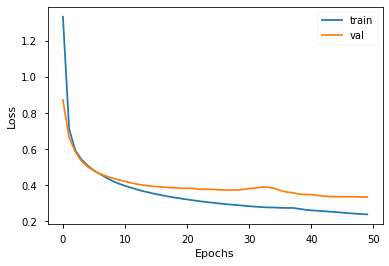

In [20]:
fig = plt.figure()
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Predictions

Now that the model is training we can evaluate its performance on the test data. This is very similar to training but we don't need to compute any grdients since we won't be updating the weights. You should either get an array of predicted classes for the test data or an array of probabilities for each class for each image.

**Hint:**  tensors on can easily be detached from the graph using `x.detach()`, moved to the CPU using `x.cpu()` and converted to numpy using `x.numpy()`. You can even do this: `x.detach().cpu().numpy()`

In [21]:
# Tell the model you're evaluating it
# this turns of things like batchnorm
model.eval()
# Array to fill with predictions
predictions = np.empty([len(test_dataset.targets), 10])
# batch size for indexing
batch_size = test_loader.batch_size
for idx, data in enumerate(test_loader):
    x = data[0].to(device).reshape(-1, 784)
    y = data[1].to(device)
    # No need to compute gradients, this is quicker and more memory efficient
    with torch.no_grad():
        y_pred = model(x)
    # Add predictions, need to moved from GPU to CPU and the converted to a numpy array
    predictions[idx*batch_size:(idx+1)*batch_size] = y_pred.cpu().numpy()

### Accuracy

We can now compute a test accuracy. Whilst this is an easy function to write yourself, this is a good opportunity to introduce `sklearn.metrics` which has various metrics predefined such as ROC curves and confusion matrices:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [22]:
from sklearn import metrics

In [23]:
true_classes = test_dataset.targets.numpy()
# For this function you must use the predicted class, not the probability
# Since we're using log-softmax we have log probabilities, use argmax to get the
# predicted class
predicted_classes = np.argmax(predictions, axis=1)
accuracy = metrics.accuracy_score(true_classes, predicted_classes)
print(f'Your final test accuracy is: {accuracy * 100} %')

Your final test accuracy is: 87.72999999999999 %


How did your model do? Here's a link to repo that hosts the data and has some results for different models: https://github.com/zalandoresearch/fashion-mnist

### Further exercise: confusion matrix



Use `sklearn.metrics` to compute the confusion matrix for the predicted classes.

From this we can see that the model does the worse with class 6, which is 'shirt'.

In [24]:
print('The classes are:', test_dataset.classes)

The classes are: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [25]:
import seaborn as sns
import pandas as pd

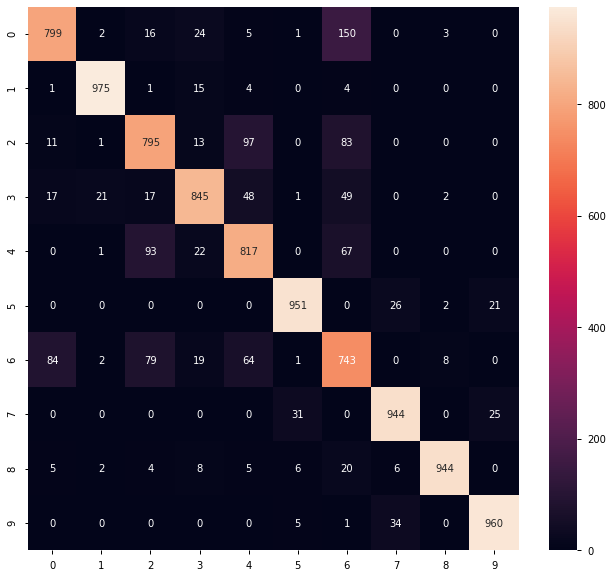

In [26]:
cm = metrics.confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize = (11, 10))
sns.heatmap(pd.DataFrame(cm), annot=True,  fmt='')
plt.show()